# Scientific Python

O `python` dispõe de uma série de bibliotecas para tarefas "científicas" que incluem:
* obter dados
* manipular e processar dados
* visualizar resultados
* comunicar resultados: produzir figuras para relatórios ou artigos e apresentações.

O _scientific python_ é composto pelos seguintes módulos:
* **python**, a generic and modern computing language
    * Python language: data types (string, int), flow control, data collections (lists, dictionaries), patterns, etc.
    * Modules of the standard library.
    * A large number of specialized modules or applications written in Python: web protocols, web framework, etc. ... and scientific computing.
    * Development tools (automatic testing, documentation generation)

* **IPython**, an advanced Python shell [http://ipython.org/](http://ipython.org/)
* **Numpy**: provides powerful numerical arrays objects, and routines to manipulate them. [http://www.numpy.org/](http://www.numpy.org/)
* **Scipy**: high-level data processing routines. Optimization, regression, interpolation, etc [http://www.scipy.org/](http://www.scipy.org/)
* **Matplotlib**: 2-D visualization, “publication-ready” plots [http://matplotlib.org/](http://matplotlib.org/)
* **Mayavi**: 3-D visualization [http://code.enthought.com/projects/mayavi/](http://code.enthought.com/projects/mayavi/)


Esta parte do tutorial é adaptada de própria documentação disponível em [https://docs.scipy.org/doc/numpy-dev/user/quickstart.html](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html).

**Referências** para mais documentação:
* [NumPy Reference](https://docs.scipy.org/doc/numpy-dev/reference/index.html#reference)
* [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html)
* [SciPy Lecture Notes](http://www.scipy-lectures.org/)

## Conteúdo 
* [Motivação](#Motivação)
* [Os básicos](#Os&nbsp;básicos)
* [Arrays](#Arrays)
* [Operações elemento-a-elemento](# Operações&nbsp;elemento-a-elemento)
* [Funções universais](# Funções&nbsp;universais)
* [Índices, slices e iterações](# Índices,&nbsp;slices&nbsp;e&nbsp;iterações)
* [Alterar as dimensões de um array](# Alterar&nbsp;as&nbsp;dimensões&nbsp;de&nbsp;um&nbsp;array.)
* [Alguns truques](# Alguns&nbsp;truques)
* [Operações algébricas](#Operações&nbsp;algébricas)


## Motivação

Para além de uma representação mais compacta (face a listas, dicionários, tuplos, ...), sempre que os dados são numéricos devem ser usados arrays NumPy. Uma das grandes vantagens é em termos da velocidade das operações.

Considere dois vectores de inteiros com 100000 entradas cada. Quer-se calcular o produto interno.

In [1]:
import numpy as np
import scipy as sci

In [2]:
v1 = [0 for x in range(1000000)]
v2 = [0 for x in range(1000000)]

In [3]:
def prodint(u,v):
    s = 0
    for i in range(len(v1)): 
        s += v1[i]*v2[i]
    return s

In [4]:
%timeit prodint(v1,v2)

10 loops, best of 3: 100 ms per loop


In [5]:
u1 = np.zeros(1000000, dtype='int32')
u2 = np.zeros(1000000, dtype='int32')

In [7]:
%timeit s = np.dot(u1,u2)

1000 loops, best of 3: 448 µs per loop


**A operação foi quantas vezes mais rápida?**

## Os&nbsp;básicos

O objecto principal do módulo NumPy é um array multidimensional homogéneo, em que todos os elementos são do mesmo tipo, indexado por um tuplo de inteiros. As dimensões de um array chamam-se _axes_. Ao número de _axes_ chama-se _rank_ (não confundir com o rank de uma matriz em álgebra).

Os arrays NumPy são objectos da classe `ndarray`. Alguns atributos importantes são:
* **ndarray.ndim** - devolve o número de _axes_ de um array;
* **ndarray.shape** - devolve o número de dimensão de um array como um tuplo. Para uma matrix com _n_ linhas e _m_ colunas, `shape` será `(n,m)';
* **ndarray.size** - número total de elementos de um array;
* **ndarray.dtype** - devolve o tipo de dados (atenção que o NumPy define tipos próprios como `numpy.int32`, `numpy.int16` e `numpy.float64`)
* **ndarray.itemsize** - o tamanho em _bytes_ de cada elemento do array
* **ndarray.nbytes** - o tamanho em _bytes_ do array

In [8]:
import numpy as np
m = np.arange(15, dtype='int32').reshape(3,5)
m

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]], dtype=int32)

In [9]:
m.shape

(3, 5)

In [10]:
m.ndim

2

In [11]:
m.size

15

In [12]:
m.dtype

dtype('int32')

In [13]:
m.itemsize

4

In [14]:
m.nbytes

60

A função `Print` mostra um arrays NumPy como se fosse uma matriz, e não uma lista de listas.

In [15]:
print (m)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


## Arrays

Um array NumPy pode criar-se de várias maneiras: `arange`, `array`, `zeros`, `ones`, `empty`, `linspace` e outras.

### `arange`

O `arange` é semelhante ao `range`, mas devolve um array NumPy em vez de uma lista.

    vector = np.arange(10)
    

In [16]:
vector = np.arange(10)
vector

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
vector.dtype

dtype('int64')

### `array`

O `array` transforma os elementos de uma lista num array NumPy.

    vector = np.array([2,3,4])
    matriz = np.array([[2, 3],[4,5]])

**Nota:** o argumento da função `array` deve ser uma lista com os elementos; `np.array(2,3,4)` gera erro!

In [18]:
vector = np.array([2,3,4])
vector

array([2, 3, 4])

In [19]:
matriz = np.array([[2, 3],[4,5]])
matriz

array([[2, 3],
       [4, 5]])

In [20]:
matriz = np.array([2,3,4,5]).reshape(2,2)
matriz

array([[2, 3],
       [4, 5]])

### `zeros`, `ones` e `empty`

Normalmente quando cria um array NumPy, os elementos iniciais podem não ser conhecidos à partida (são definidos mais tarde no programa), mas a dimensão do array sim. A biblioteca NumPy dispõe de três funções para criar um array com uma determinada dimensão, com inicializações diferentes:
* função `zeros`: todos os elementos do array são inicializados a zero;
* função `ones`: todos os elementos do array são inicializados a 1;
* função `empty`: todos os elementos do array não são inicializados.

A dimensão do array NumPy especifica-se por um tuplo (ou uma lista). Por exemplo `(2,3)` especifica um array com duas linhas e três colunas.

In [21]:
matriz_zeros = np.zeros((4,4))
matriz_zeros

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [22]:
matriz_ones = np.ones((2,10), dtype=int)
matriz_ones

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [23]:
matriz_vazia = np.empty((3,3))
matriz_vazia

array([[  4.94065646e-324,   9.88131292e-324,   1.48219694e-323],
       [  1.97626258e-323,   2.47032823e-323,   2.96439388e-323],
       [  3.45845952e-323,   3.95252517e-323,   4.44659081e-323]])

### `linspace` 

A função `linspace` é parecida com a função `arange`. A diferença é que, em vez de se indicar um incremento, indica-se quantos pontos se querem entre o primeiro e o segundo valor (inclusivé).

In [ ]:
np.arange(0,10,2)

In [ ]:
np.linspace(0,10,21) # 21 pontos entre 0 e 10 (inclusivé)

## Operações&nbsp;elemento-a-elemento

Uma das vantagens da utilização de arrays NumPy são as operações algébricas realizadas elemento-a-elemento. Elas são mais eficientes e rápidas que a tradicional solução de iterar sobre todos os seus elementos usando ciclos.


In [24]:
v1 = np.array([1,2,3,4])
v2 = np.array([2,2,4,4])

In [25]:
v1+v2 

array([3, 4, 7, 8])

In [26]:
v1-v2

array([-1,  0, -1,  0])

In [27]:
v1**2

array([ 1,  4,  9, 16])

In [28]:
10*v1

array([10, 20, 30, 40])

In [29]:
np.sin(v2)

array([ 0.90929743,  0.90929743, -0.7568025 , -0.7568025 ])

In [30]:
v1<3

array([ True,  True, False, False], dtype=bool)

### Produto

O produto entre arrays NumPy usando o operador `*` realiza uma multiplicação elemento-a-elemento. Para realizar o produto matricial deve ser usado o operador `dot`.

In [31]:
# multiplicação elemento-a-elemento
v1*v2

array([ 2,  4, 12, 16])

In [32]:
# produto interno de v1 por v2
np.dot(v1,v2)

34

In [33]:
# alternativa para o produto interno de v1 por v2
v1.dot(v2)

34

In [34]:
m1 = np.array([[2,3],[1,1]])
print (m1)

[[2 3]
 [1 1]]


In [35]:
m2 = np.array([[1,0],[1,2]])
print (m2)

[[1 0]
 [1 2]]


In [36]:
print (m1*m2)

[[2 0]
 [1 2]]


In [37]:
print (m1.dot(m2))

[[5 6]
 [2 2]]


**Nota:** Os operadores `+=`, `-=`, `*=` e outros modificam um array em vez de criar um novo.

In [38]:
m1 += m2
print (m1)

[[3 3]
 [2 3]]


### Outras operações úteis

Algumas operações operam sobre todos os elementos do array NumPy, independentemente da dimensão. É no entanto possível especificar qual a dimensão sobre qual realizam a operação, usando o argumento _axis_. 

Operações:
* **sum** - soma dos elementos
* **max** e **min** - valor do elemento máximo e mínimo
* **cumsum** - soma acumulada
* **cumprod** - produto acumulado




In [ ]:
m3 = np.array([[2,3,4],[1,1,0]])
print (m3)

In [ ]:
m3.sum()

In [ ]:
m3.sum(axis=0)

In [ ]:
m3.min(axis=1)

## Funções&nbsp;universais


O NumPy oferece um conjunto de funções matemáticas, tais como o `sin`, `cos` e `exp`. Estas funções denominam-se universais, e operam num array elemento-a-elemento resultando num novo array.

In [40]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sci']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(0.0, 12.566370614359172, -0.99999876382859743, 0.99999876382859743)

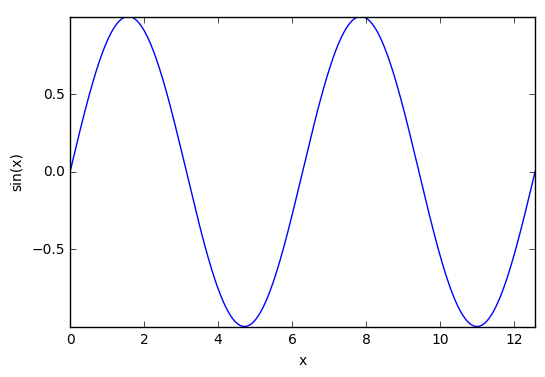

In [41]:
t = np.linspace(0,4*np.pi, 1000)
y = np.sin(t)
plot(t,y)
xlabel('x')
ylabel('sin(x)')
axis('tight')

**Outras funções universais:** `all, any, apply_along_axis, argmax, argmin, argsort, average, bincount, ceil, clip, conj, corrcoef, cov, cross, cumprod, cumsum, diff, dot, floor, inner, inv, lexsort, max, maximum, mean, median, min, minimum, nonzero, outer, prod, re, round, sort, std, sum, trace, transpose, var, vdot, vectorize, where`

## Índices,&nbsp;slices&nbsp;e&nbsp;iterações

Os arrays **unidimensionais** podem ser indexados, iterados e acedidos (slices) tal como as listas.

No caso dos arrays **bidimensionais** deve ser indicado um índice por dimensão.


In [42]:
def f(x,y): return 10*x+y
m = np.fromfunction(f, (5,4), dtype=int)
print (m)

[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]
 [40 41 42 43]]


In [43]:
m[2,3]

23

In [44]:
m[0:5,1]

array([ 1, 11, 21, 31, 41])

In [45]:
m[:,1]

array([ 1, 11, 21, 31, 41])

In [46]:
m[1,:]

array([10, 11, 12, 13])

Quando um índice não é especificado, o Python assume que o índice em falta é o _slice_ completo `:`.

In [47]:
m[-1]

array([40, 41, 42, 43])

**NOTA:** Esta notação para aceder aos elementos de um array existente em outras linguagems como o Matlab e o Fortran.
Ela é bastante conveniente para aceder a todos os aos elementos de qualquer linha e/ou coluna. Vejamos mais alguns exemplos.

Devolver a primeira e a última coluna do array (todos os elementos da primeira dimensão, apenas na primeira e última linha):

In [ ]:
m[:,[0,-1]]

Devolver a primeira e a última linhas:

In [ ]:
m[[0,-1],:]

Devolver uma matriz com a ordem das colunas invertida:

In [48]:
m[:,::-1]

array([[ 3,  2,  1,  0],
       [13, 12, 11, 10],
       [23, 22, 21, 20],
       [33, 32, 31, 30],
       [43, 42, 41, 40]])

Devolver uma matriz com duas vezes a primeira linha:

In [ ]:
m[[0,0],:]

### Iterações

As iterações sobre um array bidimensional são feitas segundo a primeira dimensão.

**Nota: são sempre preferíveis operações algébricas em vez de iterações!**

In [ ]:
for linha in m:
    print (linha)

É possível percorrer todos os elementos de um array usando a função `flat`.

In [ ]:
for i in m.flat:
    print (i),  # a vírgula faz com que o print não mude de linha...

In [ ]:
m[:,[1,0]]

## Alterar&nbsp;as&nbsp;dimensões&nbsp;de&nbsp;um&nbsp;array.

As dimensões de um array podem ser alteradas de várias formas: mudando directamente a forma, concatenando vectores e/ou arrays, etc...

### ravel

A função `ravel` transforma um array num vector:

In [ ]:
a = np.random.randint(0,10,size=(3,4))
print (a)

In [ ]:
print (a.ravel())

### reshape e resize

A função `reshape` e `resize` permitem mudar as dimensões de um array. As novas dimensões têm de ser concordantes com o número de elementos. A diferença entre as duas é:
* a função `reshape` devolve um novo array
* a função `resize` muda as dimensões do próprio array



In [ ]:
a.reshape(2,-1) # -1 o python calcula a outra dimensão de forma automática

In [ ]:
a.resize(2,6)
print (a)

In [ ]:
a

### Concatenar 

Dois arrays podem ser concatenados usando a função `concatenate`. No entanto existem as versões simplificadas `hstack` e `vstack`:

In [ ]:
v1 = np.array([2,3,4,5])
v1

In [ ]:
v2 = np.array([4,4,1,1])
v2

In [ ]:
hstack((v1,v2))

In [ ]:
vstack((v1,v2))

### Partir um array

É possível partir um array horizontalmente (`hsplit`) ou verticalmente (`vsplit`).

In [ ]:
a = np.random.randint(0,10,size=(6,4))
print (a)

In [ ]:
v1, v2 = vsplit(a,2)

In [ ]:
print (v1)

In [ ]:
print (v2)

## Alguns&nbsp;truques

O NumPy permite aceder aos elementos de um array usando como índice outro array.

In [ ]:
a = arange(1,6)**2
print (a)

In [ ]:
i = np.array([2,3,2,2,1])
print (i)

In [ ]:
print (a[i])

O mesmo é verdade para o caso bidimensional

In [ ]:
m = arange(12).reshape(3,4)
print (m)

In [ ]:
i = np.array([[0,1],[1,2]])
print (i)

In [ ]:
j = np.array([[2,1],[3,2]])
print (j)

In [ ]:
print (m[i,j])

É possível usar booleanos para indexar dentro de um array.

In [ ]:
m = arange(12).reshape(3,4)
print (m)

In [ ]:
b = m>4
print (b)

In [ ]:
m[b]

In [ ]:
m[b>4] = 0
print (m)

## Operações&nbsp;algébricas

As operações algébricas são preferíveis a iterações sobre os elementos de um array. Muitas operações encontram-se na biblioteca `numpy.linalg`: calcular inversa, a norma, valores e vectores próprios etc...

### Transposta

In [ ]:
a = arange(12).reshape(3,4)
print (a)

In [ ]:
print (a.T) # ou a.transpose()

### Matriz inversa

In [ ]:
a = np.array([[1,3],[2,4]])

In [ ]:
np.linalg.inv(a)

### Matriz identidade

In [ ]:
a = np.eye(4)
print (a)

### Produto matricial

O produto matricial obtém-se usando a função `dot`. 

In [ ]:
a = np.array([[2,3],[1,0]])
print (a)

In [ ]:
b = np.array([[2,2],[1,-1]])
print (b)

In [ ]:
print (a.dot(b))

In [ ]:
print (np.dot(a,b))

### Traço de uma matriz

In [ ]:
np.trace(a.dot(b))

### Norma de um array

A norma de um array e/ou vector obtém-se recorrendo à função `numpy.linalg.norm`.

In [ ]:
v = np.array([2,3])

** Norma $L_1$ **

In [ ]:
np.linalg.norm(v,1)

** Norma $L_2$ **

In [ ]:
np.linalg.norm(v)

In [ ]:
np.linalg.norm(v,2)

** Frobenius norm **

In [ ]:
m = arange(6).reshape(2,3)
print (m)

In [ ]:
np.linalg.norm(m, 'fro')